# Linear Shell 2 order solution

## Init symbols for *sympy*

In [1]:
from sympy import *
from geom_util import *
from sympy.vector import CoordSys3D
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

%matplotlib inline

%reload_ext autoreload
%autoreload 2
%aimport geom_util

In [2]:
# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 12)

plt.rc('text', usetex=True)
    
plt.rc('font', family='serif')

init_printing()

In [3]:
N = CoordSys3D('N')
alpha1, alpha2, alpha3 = symbols("alpha_1 alpha_2 alpha_3", real = True, positive=True)
A,K,rho, h = symbols("A K rho h")

### Square theory

$u^1 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{10}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{11}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{12}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$u^2 \left( \alpha_1, \alpha_2, \alpha_3 \right)=0 $

$u^3 \left( \alpha_1, \alpha_2, \alpha_3 \right)=u_{30}\left( \alpha_1 \right)p_0\left( \alpha_3 \right)+u_{31}\left( \alpha_1 \right)p_1\left( \alpha_3 \right)+u_{32}\left( \alpha_1 \right)p_2\left( \alpha_3 \right) $

$ \left( 
\begin{array}{c} 
u^1 \\
\frac { \partial u^1 } { \partial \alpha_1} \\
\frac { \partial u^1 } { \partial \alpha_2} \\
\frac { \partial u^1 } { \partial \alpha_3} \\
u^2 \\
\frac { \partial u^2 } { \partial \alpha_1} \\
\frac { \partial u^2 } { \partial \alpha_2} \\
\frac { \partial u^2 } { \partial \alpha_3} \\
u^3 \\
\frac { \partial u^3 } { \partial \alpha_1} \\
\frac { \partial u^3 } { \partial \alpha_2} \\
\frac { \partial u^3 } { \partial \alpha_3} \\
\end{array} 
\right) = L \cdot 
\left( 
\begin{array}{c} 
u_{10} \\
\frac { \partial u_{10} } { \partial \alpha_1} \\
u_{11} \\
\frac { \partial u_{11} } { \partial \alpha_1} \\
u_{12} \\
\frac { \partial u_{12} } { \partial \alpha_1} \\
u_{30} \\
\frac { \partial u_{30} } { \partial \alpha_1} \\
u_{31} \\
\frac { \partial u_{31} } { \partial \alpha_1} \\
u_{32} \\
\frac { \partial u_{32} } { \partial \alpha_1} \\
\end{array} 
\right) $

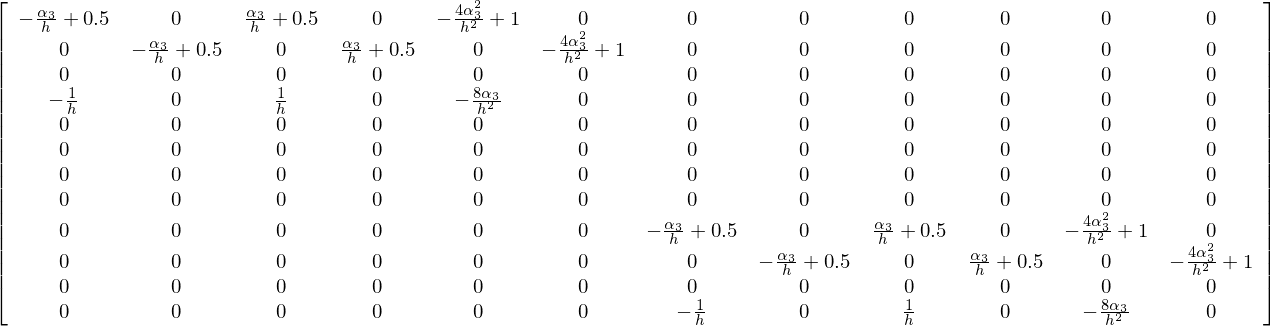

In [4]:
L=zeros(12,12)
p0=1/2-alpha3/h
p1=1/2+alpha3/h
p2=1-(2*alpha3/h)**2

L[0,0]=p0
L[0,2]=p1
L[0,4]=p2

L[1,1]=p0
L[1,3]=p1
L[1,5]=p2

L[3,0]=p0.diff(alpha3)
L[3,2]=p1.diff(alpha3)
L[3,4]=p2.diff(alpha3)

L[8,6]=p0
L[8,8]=p1
L[8,10]=p2

L[9,7]=p0
L[9,9]=p1
L[9,11]=p2

L[11,6]=p0.diff(alpha3)
L[11,8]=p1.diff(alpha3)
L[11,10]=p2.diff(alpha3)

L

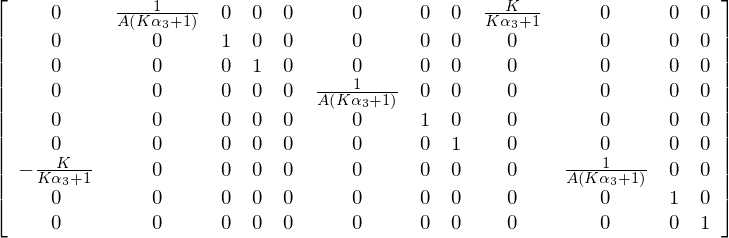

In [5]:
B=Matrix([[0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0, K/(K*alpha3 + 1), 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [-K/(K*alpha3 + 1), 0, 0, 0, 0, 0, 0, 0, 0, 1/(A*(K*alpha3 + 1)), 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
B

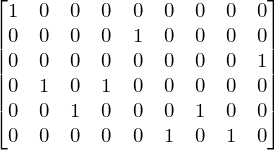

In [6]:
E=zeros(6,9)
E[0,0]=1
E[1,4]=1
E[2,8]=1
E[3,1]=1
E[3,3]=1
E[4,2]=1
E[4,6]=1
E[5,5]=1
E[5,7]=1
E

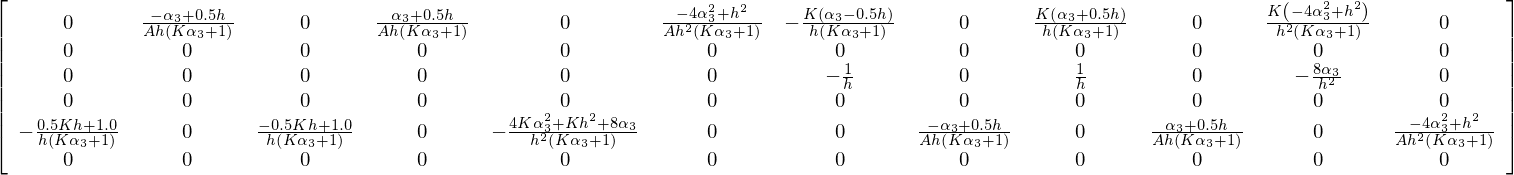

In [7]:
simplify(E*B*L)

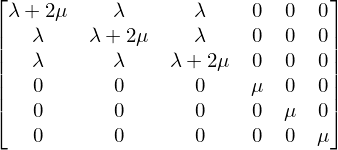

In [8]:
mu = Symbol('mu')
la = Symbol('lambda')
C_tensor = getIsotropicStiffnessTensor(mu, la)
C = convertStiffnessTensorToMatrix(C_tensor)
C

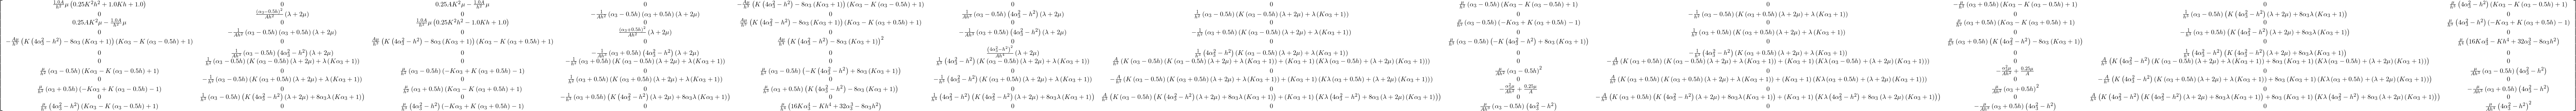

In [9]:
S=L.T*B.T*E.T*C*E*B*L*A*(1+alpha3*K)**2
S=simplify(S)
S

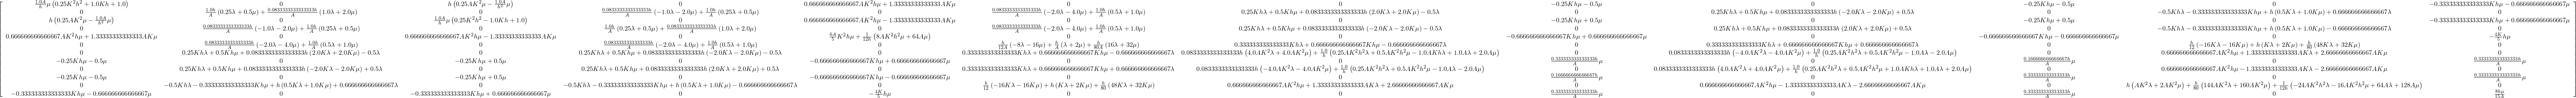

In [10]:
S_in = integrate(S,(alpha3, -h/2, h/2))
S_in

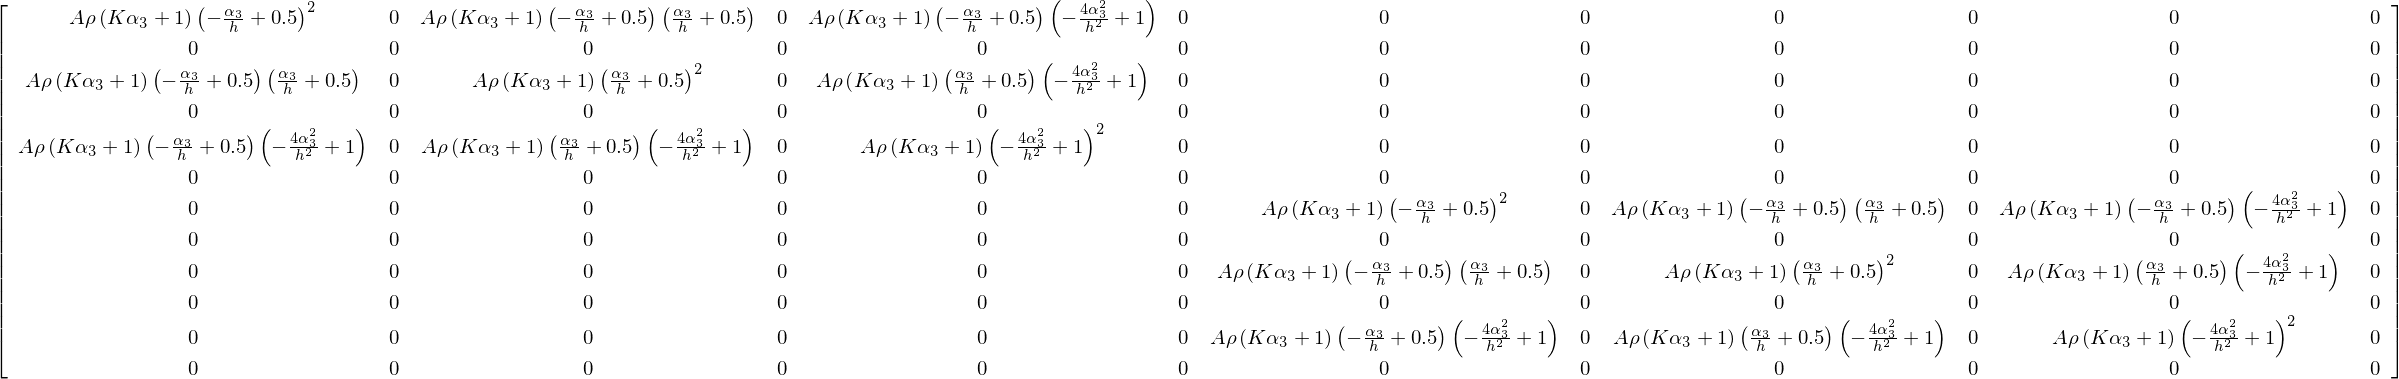

In [11]:
M=Matrix([[rho, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, rho, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, rho, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
M=L.T*M*L*A*(1+alpha3*K)
M

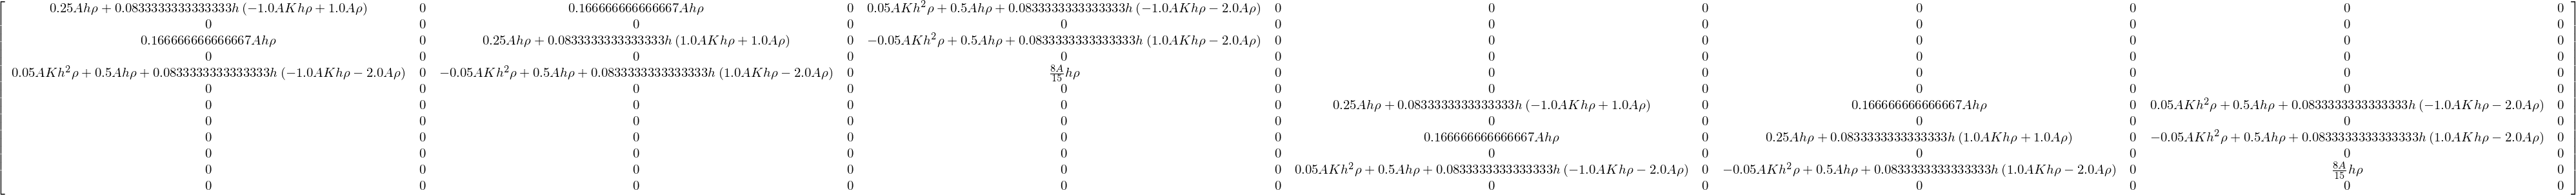

In [12]:
M_in = integrate(M,(alpha3, -h/2, h/2))
M_in

## Cartesian coordinates

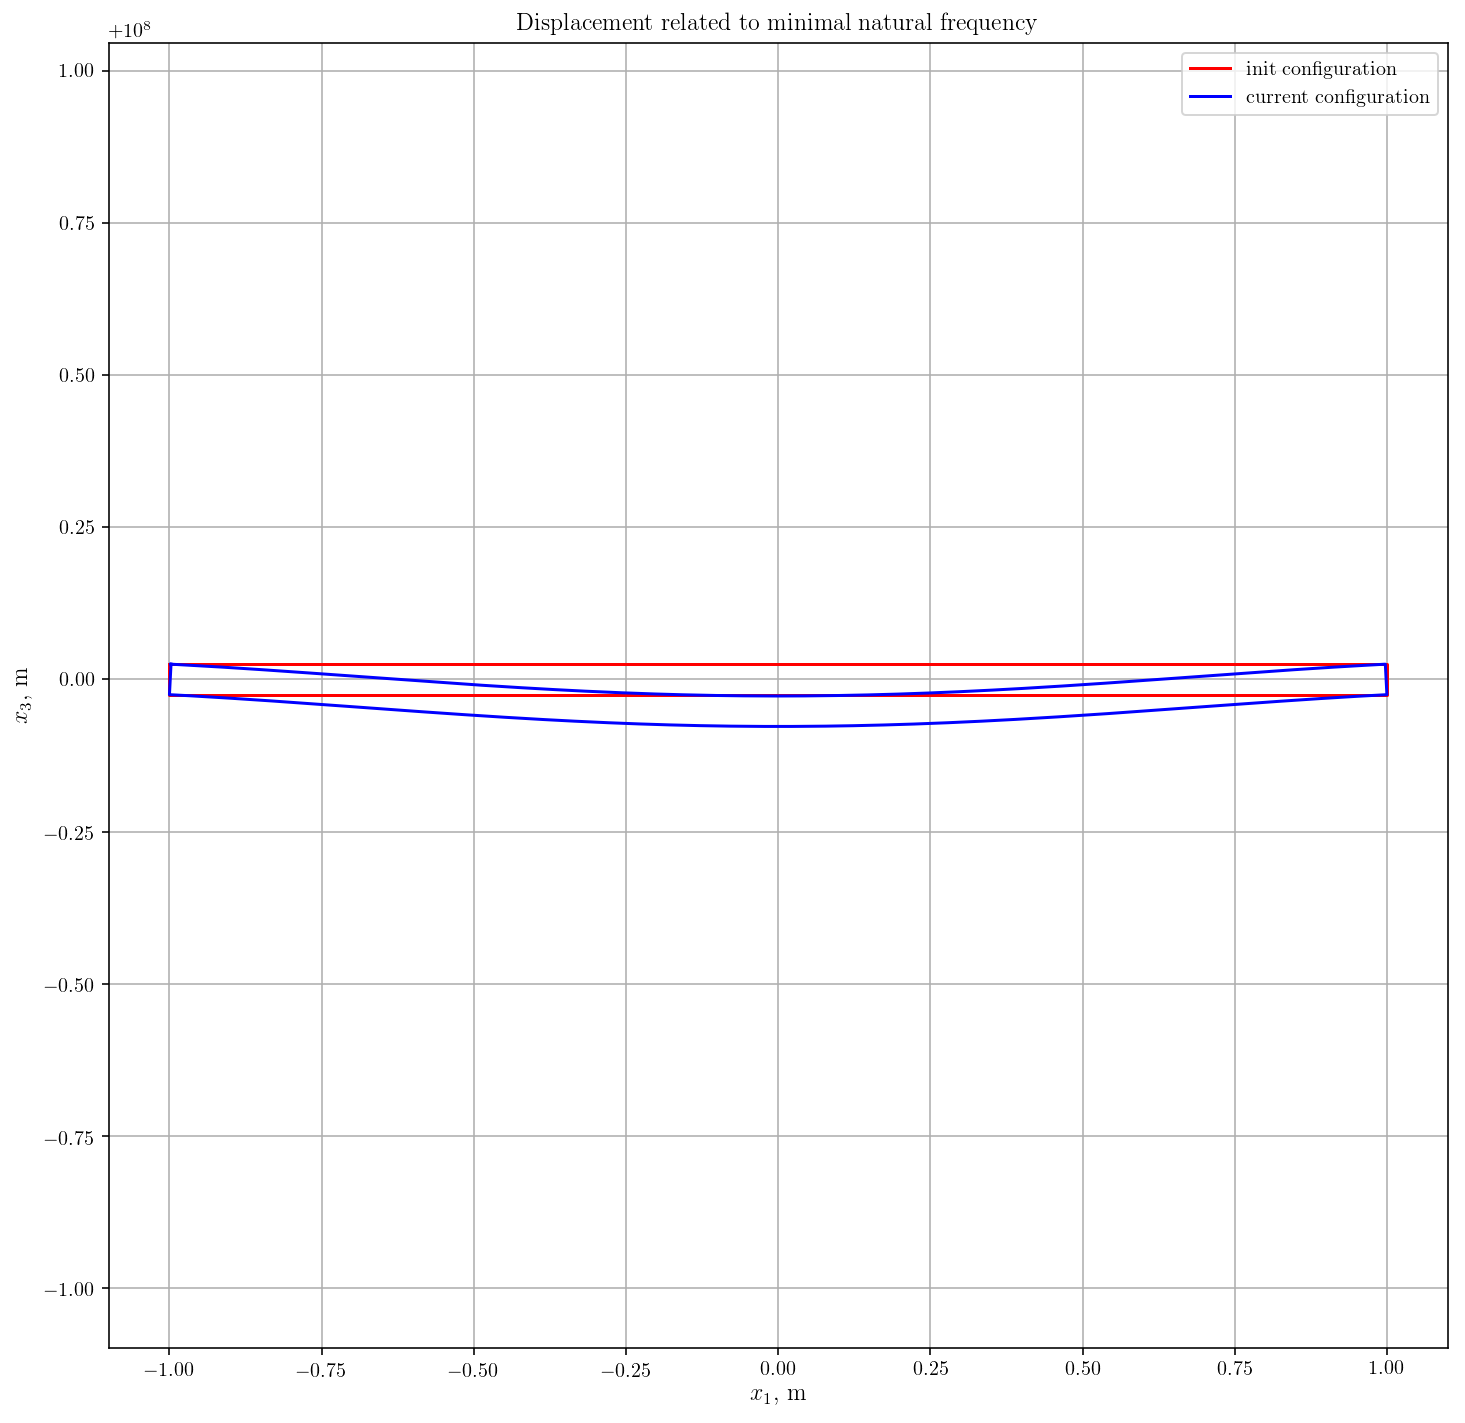

48.7795062169
123.888496916
304.061542126
479.094735833
785.332164786
951.503628353
1275.80327033
1458.685062
1953.82583715
2146.65824985
2596.48851012
2852.00303257
3493.26109137
3532.52456554
4187.1427624
4486.19861785
5035.2968379
5295.31059395
6059.9046713
6081.99765475


In [44]:
import fem.geometry as g
import fem.model as m
import fem.material as mat
import fem.shellsquared.shellsolver as s
import fem.shellsquared.mesh1D as me
import plot

stiffness_matrix_func = lambdify([A, K, mu, la, h], S_in, "numpy")
mass_matrix_func = lambdify([A, K, rho, h], M_in, "numpy")


def stiffness_matrix(material, geometry, x1, x2, x3):
    A,K = geometry.get_A_and_K(x1,x2,x3)
    return stiffness_matrix_func(A, K, material.mu(), material.lam(), thickness)

def mass_matrix(material, geometry, x1, x2, x3):
    A,K = geometry.get_A_and_K(x1,x2,x3)
    return mass_matrix_func(A, K, material.rho, thickness)



def generate_layers(thickness, layers_count, material):
    layer_top = thickness / 2
    layer_thickness = thickness / layers_count
    layers = set()
    for i in range(layers_count):
        layer = m.Layer(layer_top - layer_thickness, layer_top, material, i)
        layers.add(layer)
        layer_top -= layer_thickness
    return layers


def solve(geometry, thickness, linear, N_width):
    layers_count = 1
    layers = generate_layers(thickness, layers_count, mat.IsotropicMaterial.steel())
    model = m.Model(geometry, layers, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    mesh = me.Mesh1D.generate(width, layers, N_width, m.Model.FIXED_BOTTOM_LEFT_RIGHT_POINTS)
    lam, vec = s.solve(model, mesh, stiffness_matrix, mass_matrix)
    
    return lam, vec, mesh, geometry



width = 2
curvature = 0.00000001
thickness = 0.05

corrugation_amplitude = 0
corrugation_frequency = 0

geometry = g.General(width, curvature, corrugation_amplitude, corrugation_frequency)

N_width = 100

lam, vec, mesh, geometry = solve(geometry, thickness, False, N_width)

results = s.convert_to_results(lam, vec, mesh, geometry, thickness)

results_index = 0
    
plot.plot_init_and_deformed_geometry_in_cartesian(results[results_index], 0, width, -thickness / 2, thickness / 2, 0, geometry.to_cartesian_coordinates)
to_print = 20
if (len(results) < to_print):
    to_print = len(results)
    
for i in range(to_print):
    print(results[i].rad_per_sec_to_Hz(results[i].freq))


In [40]:
values_N_width = [50, 100, 150, 200, 300, 400]

width = 2
curvature = 0.00000001
thickness = 0.05

corrugation_amplitude = 0
corrugation_frequency = 0

geometry = g.General(width, curvature, corrugation_amplitude, corrugation_frequency)

results_all_n = {}

for n in values_N_width:
    lam, vec, mesh, geometry = solve(geometry, thickness, False, n)

    results = s.convert_to_results(lam, vec, mesh, geometry, thickness)
    
    results_all_n[n]=results

In [42]:
from jupyter_utils import ListTable

table = ListTable()
header = ['$\omega_i \\ N$']

for n in values_N_width:
    header.append(n)

table.append(header)

to_print = 5
for i in range(to_print):
    row = [i]
    for n in values_N_width:
        results = results_all_n[n]
        wi = results[i].rad_per_sec_to_Hz(results[i].freq)
        row.append(wi)
    
    table.append(row)


table

$\omega_i \ N$,50,100,150,200,300,400
0,51.195687069160954,48.779506216872335,48.27203150085045,48.084580029059616,47.94605484440092,47.89643625240351
1,133.5287881698858,123.88849691618837,122.02007291413294,121.35844666943743,120.88296919257753,120.71589670355955
2,325.351857214748,304.0615421255906,299.9132649669145,298.4373291506314,297.372191764495,296.99657643336894
3,517.7679240453401,479.0947358334275,471.5425030117748,468.84811961137456,466.8998086260552,466.2118476433035
4,847.2290327905723,785.3321647855595,773.3787060538156,769.1320668172788,766.0657561806494,764.9829905380635
